In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
import plotly.express as px

### Observacion: El proyecto no esta presentado con conexiones a API ya que el proyecto se basa en un Data set generado por un encuenta en Kagle y no encontre una Api que se ajuste a estos datos. Pero fue muy util usar Api para conectarme a otras Api diferentes y navegarlas en su formato JSON

In [ ]:
df=pd.read_csv("mxmh_survey_results.csv")

In [12]:
df.head(3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.


## Distribucion de niveles de cada patologia entre los participantes

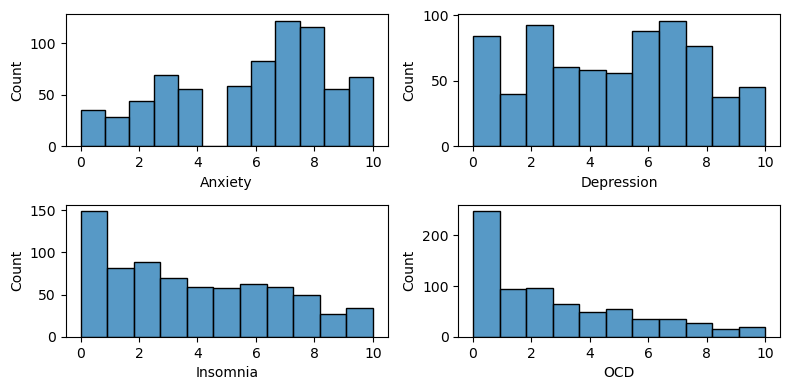

In [87]:
f,axs=plt.subplots(2,2,figsize=(8,4))
sns.histplot(data=df,x="Anxiety",ax=axs[0,0])
sns.histplot(data=df,x="Depression",ax=axs[0,1])
sns.histplot(data=df,x="Insomnia",ax=axs[1,0])
sns.histplot(data=df,x="OCD",ax=axs[1,1])
plt.tight_layout()
plt.show()

# Motivacion y Audiencia:
- La audiencia de este estudio fueron todas las personas que quisieron participar de la encuesta para medir sus gustos musicales y su salud mental.
- En este analisis se busca determinar si es posible predecir si hay una mejora en el estado de animo de los participantes basado en la musica que escuchan. Los valores posibles son : **Mejora, Empeora, No hay efecto**.

# Preguntas y Descubrimientos

### **Hay una mejora en los participantes?**
- A primera vista hay un 75% de usuarios que registran una mejora, un 2% que registran un empeoramiento y un 23% que no siente cambios.

Distribución de la variable objetivo:
Improve      0.744505
No effect    0.232143
Worsen       0.023352
Name: Music effects, dtype: float64


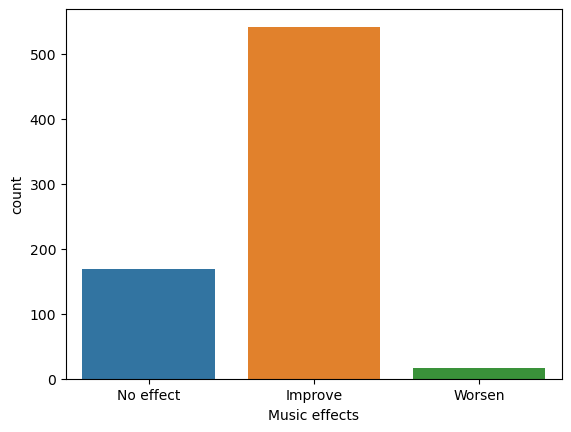

In [7]:
print('Distribución de la variable objetivo:')
print(df['Music effects'].value_counts(normalize=True))
sns.countplot(x='Music effects', data=df)
plt.show()

### Que podemos predecir a partir de los datos del dataset?

- Basados en estos datos que tenemos podemos separar el dataset entre gente que registra mejora y gente que no siente mejora para analizar el problema como un problema de **clasificacion boleana** con valores de mejora o no mejora.

### Fue proporcional la cantidad de horas de musica escuchadas entre la gente que mejora, empeora y no siente diferencia?

- Segun los datos del dataset la gente que mejoro "Improve" fue la que mas escucho musica totalizando 1985 Hs contra los que no sintieron efecto que escucharon en total 582 horas y los que empeoraron fueron los que menos escucharon con 47 horas en total

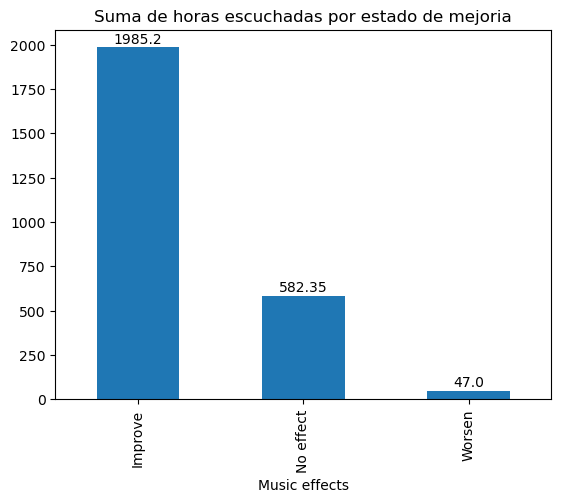

In [8]:
grupos_suma=df.groupby('Music effects')['Hours per day'].sum()

# graficar las barras
ax = grupos_suma.plot(kind='bar')

# agregar etiquetas
for i in ax.patches:
    ax.annotate(str(round(i.get_height(), 2)), 
                xy=(i.get_x() + i.get_width() / 2, i.get_height()), 
                xytext=(0, 1), 
                textcoords='offset points', 
                ha='center', va='bottom')
    
ax.set_title("Suma de horas escuchadas por estado de mejoria")
                
plt.show()

### Fue proporcional la cantidad de horas escuchadas por persona segun estado de mejoria?

- No fue parejo ya que se detectaron muchos Outliers en la cantidad de horas escuchadas por estado de mejoria tanto en los que mejoraron como los que no sintieron efecto


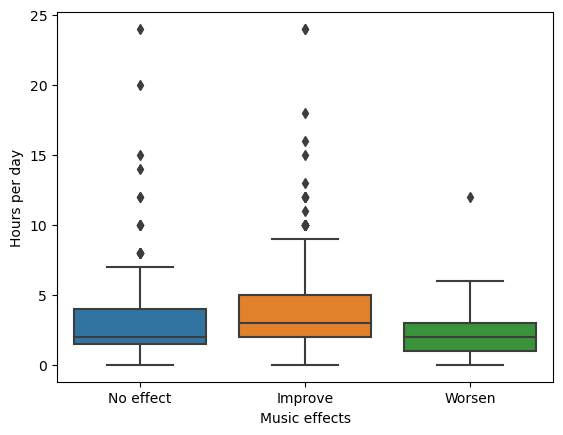

In [9]:
sns.boxplot(x='Music effects', y='Hours per day', data=df)

# mostrar el gráfico
plt.show()

### Hay alguna relación entre la edad y los efectos de la música?

- Tienden a ser ms jovenes los que registran que mejoran o empeoran

<AxesSubplot:xlabel='Music effects', ylabel='Age'>

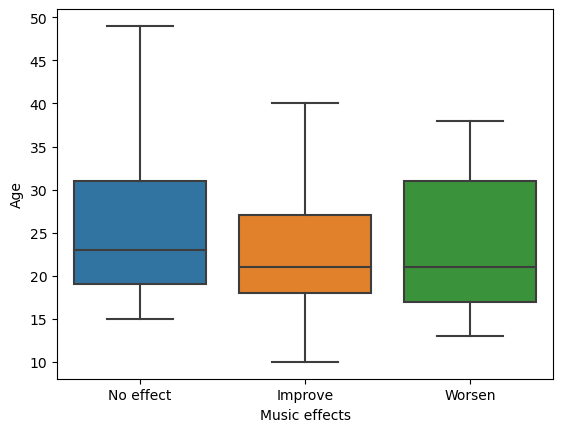

In [10]:
sns.boxplot(x='Music effects', y='Age', data=df,showfliers=False)

### Hay una relación entre las patologías y los efectos de la música?

- Los que reportan que la música mejora o empeora los efectos tienden a tener niveles más altos de ansiedad,depresión, insomnio y OCD.

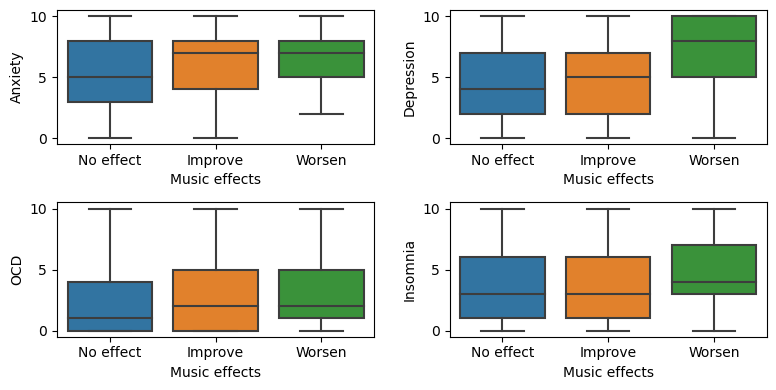

In [11]:
f, axs = plt.subplots(2, 2, figsize=(8, 4))
sns.boxplot(x='Music effects', y='Anxiety', data=df, ax=axs[0, 0])
sns.boxplot(x='Music effects', y='Depression', data=df, ax=axs[0, 1])
sns.boxplot(x='Music effects', y='OCD', data=df, ax=axs[1, 0])
sns.boxplot(x='Music effects', y='Insomnia', data=df, ax=axs[1, 1]) # Se cambia axs[1,1] a axs[1,0]
plt.tight_layout()
plt.show()

#### Hay relación entre los servicios de Streaming y el efecto en la música?

- Los que reportan que la música mejora o empeora los efectos tienden a utilizar OTROS servicios de streaming distintos a los mas populares.Esta representado por **'Other Streaming Service'**

<AxesSubplot:xlabel='Music effects', ylabel='count'>

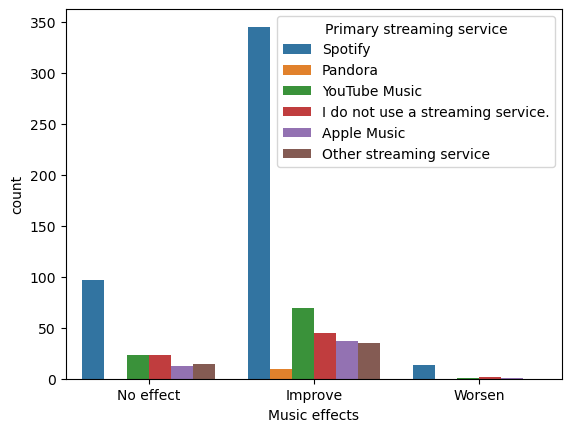

In [13]:
sns.countplot(x='Music effects', hue='Primary streaming service', data=df)

### Hay alguna relacion entre la gente que escucha en el trabajo y su estado

- Si, en su mayoria los que mejoraron escuchaban musica en el trabajo

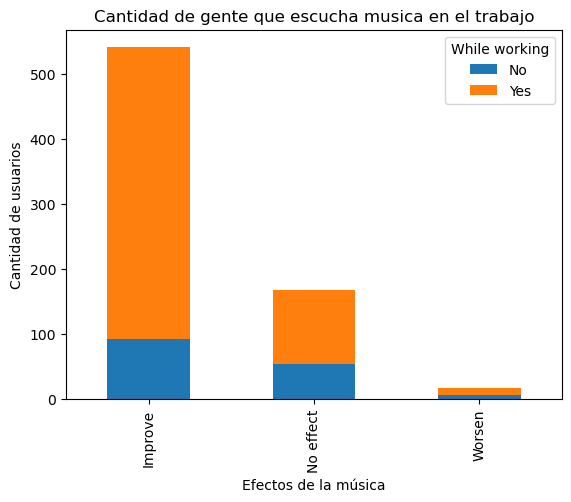

In [24]:
grupos = df.groupby(['Music effects', 'While working'])['Timestamp'].count().reset_index()

ax = grupos.pivot(index='Music effects', columns='While working', values='Timestamp').plot(kind='bar', stacked=True)

ax.set_title('Cantidad de gente que escucha musica en el trabajo')
ax.set_xlabel('Efectos de la música')
ax.set_ylabel('Cantidad de usuarios')

plt.show()

In [25]:
categorical=df.dtypes[df.dtypes=="object"].index

# Analisis Bivariado

### La gente que mejora tiene numeros mas bajos de Ansiedad, Depresion, Ansiedad, Insomnia?

- No se ve una diferencia notora solo teniendo en cuenta variable de Efecto y Status en cantidad de personas. 
- En los 3 estatus el valor promedio de calificacion no se ve mejor en los que mejoran en comparacion con los otros 2 grupos, mas aun teniendo en cuenta que nuestro foco es **Mejora vs No mejora**

In [26]:
(df.groupby("Music effects")
 .agg({"Age":"mean", "Hours per day":"mean", "Music effects":"size","Anxiety":"mean","Depression":"mean","Insomnia":"mean","OCD":"mean"})
 .rename(columns={"Music effects":"# Personas"}))

,Age,Hours per day,# Personas,Anxiety,Depression,Insomnia,OCD
Music effects,,,,,,,
Improve,24.724584,3.662731,542,6.047048,4.861624,3.755535,2.719557
No effect,26.733728,3.445858,169,5.124260,4.378698,3.668639,2.360947
Worsen,22.647059,2.764706,17,6.764706,7.176471,4.529412,3.117647


## Vamos a comenzar a revisar con otras variables para ver si encontramos algo que nos indique de forma mas clara donde se 'desencadenan' mas casos que puedan justificar la mejora de los pacientes teniendo en cuenta las variables del dataset que describen sus habitos

### 1-Impacto por habito de tocar instrumento

- No se ve una mejora entre los que tocan un instrumento y los que no tocan para cada grupo de Status. Los numeros son similares

In [27]:
(df.groupby(["Music effects","Instrumentalist"])
 .agg({"Age":"mean", "Hours per day":"mean", "Music effects":"size","Anxiety":"mean","Depression":"mean","Insomnia":"mean","OCD":"mean"})
 .rename(columns={"Music effects":"# Personas"}))

Age  Hours per day  # Personas   Anxiety  \
Music effects Instrumentalist                                                   
Improve       No               25.891738       3.771165         352  5.970170   
              Yes              22.643617       3.418883         188  6.196809   
No effect     No               27.359375       3.294922         128  5.195312   
              Yes              24.950000       3.940000          40  4.850000   
Worsen        No               23.153846       3.038462          13  6.923077   
              Yes              21.000000       1.875000           4  6.250000   

                               Depression  Insomnia       OCD  
Music effects Instrumentalist                                  
Improve       No                 4.811080  3.684659  2.700284  
              Yes                4.933511  3.853723  2.763298  
No effect     No                 4.500000  3.609375  2.351562  
              Yes                4.100000  3.875000  2.425000  
Worsen        No                 7.076923  4.538462  2.769231  
              Yes                7.500000  4.500000  4.250000

### 2-Impacto por habito de escuchar en el trabajo o mientras estudia

- Las personas que registraron una mejora, en su gran mayoria escuchaba musica mientras trabajaba o estudiaba por lo que el promedio de horas fue de 3,98 contra 1,96 de los que no escuchaban en esos momentos y registraron mejoras. A simple vista parece que tuvo un gran impacto en la mejoria, escuchar musica en esos momentos.
- En los grupos de no mejora y empeoramiento tambien el momento que fue ampliamente elegido para escuchar musica fue mientras se estudiaba o trabajaba, la brecha entre los que escuchaban y no escuchaban era de un un **83%** (11vs6) entre los que empeoraban , un **105%** (6vs11) entre los que no sentian efecto sin embargo en el grupo que mejoro, era brecha era de **388%** (449vs92). 
- A medida que la persona se reconocia en situacion de mejora, la chance de que haya escuchado musica en el trabajo era mucho mayor en comparacion en los otros 2 grupos

In [28]:
(df.groupby(["Music effects","While working"])
 .agg({"Age":"mean", "Hours per day":"mean", "Music effects":"size","Anxiety":"mean","Depression":"mean","Insomnia":"mean","OCD":"mean"})
 .rename(columns={"Music effects":"# Personas"}))

Age  Hours per day  # Personas   Anxiety  \
Music effects While working                                                   
Improve       No             26.326087       1.966848          92  5.836957   
              Yes            24.383929       3.989421         449  6.081292   
No effect     No             27.981818       1.913636          55  5.236364   
              Yes            25.991150       4.222124         113  5.035398   
Worsen        No             23.333333       1.500000           6  6.333333   
              Yes            22.272727       3.454545          11  7.000000   

                             Depression  Insomnia       OCD  
Music effects While working                                  
Improve       No               4.565217  3.896739  2.266304  
              Yes              4.910913  3.712695  2.802895  
No effect     No               4.163636  2.963636  1.872727  
              Yes              4.522124  3.955752  2.619469  
Worsen        No               6.166667  3.000000  3.666667  
              Yes              7.727273  5.363636  2.818182

### 3-Impacto por habito de buscar nuevos artistas o generos
- En el caso de los que exploraban nuevos generos tambien se ve una predominancia entre los que mejoraron con una brecha de **210%** (410vs132).

In [29]:
(df.groupby(["Music effects","Exploratory"])
 .agg({"Age":"mean", "Hours per day":"mean", "Music effects":"size","Anxiety":"mean","Depression":"mean","Insomnia":"mean","OCD":"mean"})
 .rename(columns={"Music effects":"# Personas"}))

Age  Hours per day  # Personas   Anxiety  \
Music effects Exploratory                                                   
Improve       No           28.886364       2.904924         132  5.924242   
              Yes          23.381418       3.906707         410  6.086585   
No effect     No           27.926471       3.104412          68  5.397059   
              Yes          25.930693       3.675743         101  4.940594   
Worsen        No           28.000000       1.428571           7  6.714286   
              Yes          18.900000       3.700000          10  6.800000   

                           Depression  Insomnia       OCD  
Music effects Exploratory                                  
Improve       No             4.424242  3.606061  2.659091  
              Yes            5.002439  3.803659  2.739024  
No effect     No             4.441176  3.264706  2.147059  
              Yes            4.336634  3.940594  2.504950  
Worsen        No             6.714286  4.000000  2.857143  
              Yes            7.500000  4.900000  3.300000

## 4- Impacto por genero musical favorito

- Se ve un impacto mucho mayor de acuerdo a los generos favoritos que otras variables

In [30]:
(df.groupby(["Music effects","Fav genre"])
 .agg({"Age":"mean", "Hours per day":"mean", "Music effects":"size","Anxiety":"mean","Depression":"mean","Insomnia":"mean","OCD":"mean"})
 .rename(columns={"Music effects":"# Personas"}))

Age  Hours per day  # Personas  \
Music effects Fav genre                                                
Improve       Classical         27.461538       3.083333          39   
              Country           25.650000       3.375000          20   
              EDM               21.433333       4.866667          30   
              Folk              24.739130       3.195652          23   
              Gospel            55.666667       2.375000           6   
              Hip hop           23.133333       3.741935          31   
              Jazz              23.875000       5.968750          16   
              K pop             18.368421       4.526316          19   
              Latin             18.000000       5.000000           1   
              Lofi              22.100000       4.200000          10   
              Metal             25.104478       3.559701          67   
              Pop               22.894118       2.988235          85   
              R&B               25.038462       3.634615          26   
              Rap               19.000000       4.823529          17   
              Rock              27.420635       3.751587         126   
              Video game music  20.192308       2.980769          26   
No effect     Classical         23.230769       2.192308          13   
              Country           24.200000       3.600000           5   
              EDM               25.333333       3.666667           6   
              Folk              30.666667       3.683333           6   
              Hip hop           25.750000       5.375000           4   
              Jazz              31.750000       3.250000           4   
              K pop             18.000000       3.000000           4   
              Latin             17.000000      12.000000           1   
              Metal             25.142857       3.714286          21   
              Pop               25.040000       2.840000          25   
              R&B               26.222222       3.000000           9   
              Rap               35.750000       7.250000           4   
              Rock              29.735849       3.452830          53   
              Video game music  23.642857       3.232143          14   
Worsen        Classical         17.000000       4.000000           1   
              Pop               19.750000       1.625000           4   
              Rap               13.000000       6.000000           1   
              Rock              26.000000       3.571429           7   
              Video game music  23.500000       1.375000           4   

                                  Anxiety  Depression  Insomnia       OCD  
Music effects Fav genre                                                    
Improve       Classical          4.846154    4.128205  4.205128  2.333333  
              Country            5.150000    4.300000  2.950000  2.500000  
              EDM                5.333333    5.133333  4.200000  2.833333  
              Folk               7.086957    5.565217  3.608696  2.304348  
              Gospel             4.833333    2.666667  5.333333  0.333333  
              Hip hop            6.290323    5.677419  3.258065  3.032258  
              Jazz               6.437500    5.187500  4.500000  2.562500  
              K pop              6.473684    4.000000  3.631579  2.578947  
              Latin             10.000000    6.000000  0.000000  0.000000  
              Lofi               6.100000    6.600000  5.600000  3.400000  
              Metal              6.343284    5.462687  4.716418  2.686567  
              Pop                6.158824    4.394118  3.211765  2.747059  
              R&B                5.269231    3.576923  3.000000  3.230769  
              Rap                5.470588    4.352941  2.411765  3.117647  
              Rock               6.500000    5.321429  3.829365  2.853175  
              Video game music   5.538462    4.076923  3.192308  2.500000  
No ef